In [26]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
np.random.seed(42)
def split_dataset(csv,k=4):
    test_idx = np.random.randint(csv.shape[0], size=num_test)
    features_test = csv[test_idx,2:8]
    label_test = csv[test_idx,1]
    csv = np.delete(csv,test_idx,axis=0)
    rows = csv.shape[0]
    a = int(rows//k)
    dataset_train = []
    dataset_val = []
    for i in range(k):
        training_idx = np.random.randint(csv.shape[0], size=(k-1)*a)
        test_idx = np.random.randint(csv.shape[0], size=a)
        training, val = csv[training_idx,:], csv[test_idx,:]
        dataset_train.append(training)
        dataset_val.append(val)
    return dataset_train,dataset_val,features_test,label_test



num_test = 1000
csv = pd.read_csv('C:/Users/carol/DataSience/data/data.csv',sep=',').values
train, val,features_test,label_test = split_dataset(csv)
hyperparamas_n_est = [5,7,9,11,13]
hyperparams_max_depth = [5,10,15,20,25]
best_score = 0
clf_list = []
clf_without_search = RandomForestClassifier()
best_idx = 0

### CV and Gridsearch
for idx,(param1,param2) in enumerate(zip(hyperparamas_n_est,hyperparams_max_depth)):
    clf = RandomForestClassifier(n_estimators=param1,max_depth=param2)
    score_list = []
    for idx_cv,(data_train,data_val) in enumerate(zip(train,val)):
        label_train = data_train[:,1]
        features_train = data_train[:,2:8]
        label_val = data_val[:,1]
        features_val = data_val[:,2:8]
        clf.fit(features_train,label_train)
        score = clf.score(features_val,label_val)
        score_list.append(score)
        score = np.array(score_list).mean()
        clf_list.append(clf)
        if score > best_score:
            best_score = score
            best_idx = idx
    print("Best Score: {} with following parameters: n_est = {} and max_depth = {}".format(best_score,param1,param2))

Best Score: 0.9722814498933902 with following parameters: n_est = 5 and max_depth = 5
Best Score: 0.9743470149253731 with following parameters: n_est = 7 and max_depth = 10
Best Score: 0.9793443496801706 with following parameters: n_est = 9 and max_depth = 15
Best Score: 0.9793443496801706 with following parameters: n_est = 11 and max_depth = 20
Best Score: 0.9793443496801706 with following parameters: n_est = 13 and max_depth = 25


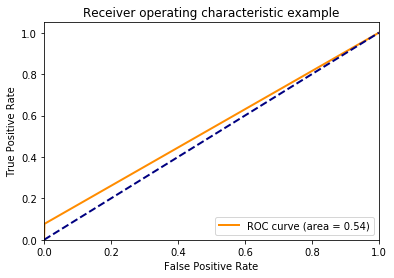

In [27]:
best_clf = clf_list[best_idx]
pred = best_clf.predict(features_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(label_test, pred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

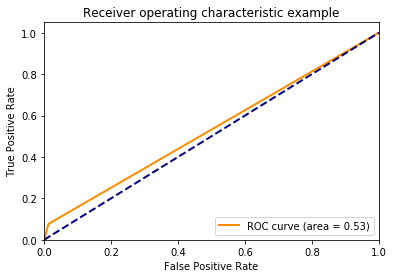

In [28]:
clf_without_search.fit(train[0][:,2:8],train[0][:,1])
pred = clf_without_search.predict(features_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(label_test, pred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
       lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()